<a id="1"></a>
# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:180%; font-family:Arial, sans-serif; background-color:#84172D; color:#EDEBEC; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> Power of Neural Network in Digit Recognition </b></div>

![ai](https://r2.starryai.com/results/1050111228/f615547a-0894-401a-8e47-ec9a50dd8ed7.webp)

# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:110%; font-family:Arial, sans-serif; background-color:#056C90; color:#EDEBEC; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 1. Introduction </b></div>

In the rapidly evolving field of artificial intelligence (AI), neural networks have become a powerful tool for solving complex problems, such as digit recognition. This project begins by establishing a baseline using dense neural networks, before transitioning to more advanced convolutional neural networks (CNNs). The aim is to showcase how different types of neural networks can be applied to the MNIST dataset, which contains 28,000 images of handwritten digits, and progressively improve accuracy in digit classification.

## Understanding Neural Networks
Neural networks are inspired by the structure and function of the human brain. Just as neurons in the brain process information, artificial neurons in a neural network take inputs, process them, and pass on the result. These neurons are organized into layers, where each layer learns progressively more complex patterns in the data.

We begin this project with dense (fully connected) neural networks, where each neuron in one layer is connected to every neuron in the next. These layers extract features from the input data (in our case, the pixel values of handwritten digits) and perform non-linear transformations to predict the digit. Dense networks are effective for simple datasets, but they often struggle with image data, where spatial relationships between pixels are key.

## From Dense Networks to CNNs
While dense neural networks can serve as a strong baseline, convolutional neural networks (CNNs) are far better suited for image classification tasks. CNNs take advantage of the spatial structure of images by applying filters (convolutions) to detect patterns such as edges, curves, and textures, allowing the network to "see" the image in a more structured way. These filters automatically learn to detect features at different levels of abstraction, making CNNs more effective in recognizing and classifying complex patterns in images, such as handwritten digits.

# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:110%; font-family:Arial, sans-serif; background-color:#056C90; color:#EDEBEC; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 2. Importing Libraries </b></div>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L2
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:110%; font-family:Arial, sans-serif; background-color:#056C90; color:#EDEBEC; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 3. Data Preparation </b></div>

## Loading data

In [2]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

## Separating features and labels

In [3]:
X = train.drop("label", axis=1) 
y = train.label

## Data normalization

This step ensures that our input data is in a suitable range for training a neural network, leading to better performance and faster learning.

In [4]:
# Normalize the data (scale pixel values between 0 and 1)
X = X / 255.0
X_test = test / 255.0

## Spliting data into training and testing sets

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)

## Preview Images

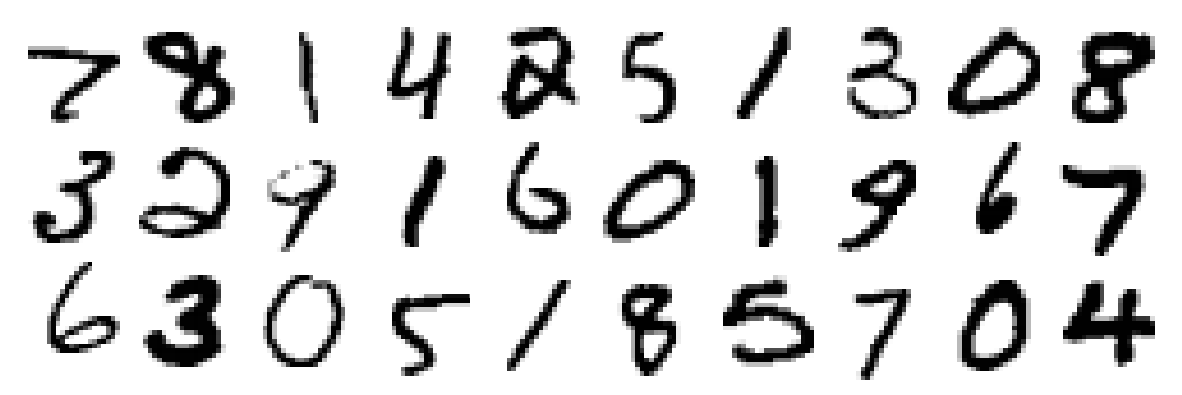

In [6]:
X_reshaped = X_train.to_numpy().reshape(-1, 28, 28, 1)

plt.figure(figsize=(15, 5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_reshaped[i, :, :, 0], cmap=plt.cm.binary)  # Access the 28x28 image directly
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()


# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:110%; font-family:Arial, sans-serif; background-color:#056C90; color:#EDEBEC; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 4. Dense Neural Network </b></div>

A dense neural network, also known as a fully connected neural network (FCNN) or multi-layer perceptron (MLP), is a machine learning model that connects each layer to the previous layer.

We will train the model through iterative steps, starting with a simple version. If the model shows signs of high bias or underfitting, we'll increase its complexity. If the model shows high variance or overfitting, we'll boost the regularization. This approach should help us achieve better results.

In [7]:
# Define a simple model
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='softmax')
])

In [8]:
# Compile the model with an Adam optimizer and metrics
model.compile(
    optimizer = Adam(learning_rate=1e-3),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [9]:
# Train the model
model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30


I0000 00:00:1727123479.464082      71 service.cc:145] XLA service 0x7aefb0016160 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727123479.464136      71 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727123479.464142      71 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 114/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3487 - loss: 1.9690

I0000 00:00:1727123481.388812      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1182/1182 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7317 - loss: 0.8819 - val_accuracy: 0.9233 - val_loss: 0.2592
Epoch 2/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9284 - loss: 0.2408 - val_accuracy: 0.9429 - val_loss: 0.2040
Epoch 3/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9435 - loss: 0.1847 - val_accuracy: 0.9450 - val_loss: 0.1825
Epoch 4/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9531 - loss: 0.1578 - val_accuracy: 0.9460 - val_loss: 0.1735
Epoch 5/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9590 - loss: 0.1375 - val_accuracy: 0.9517 - val_loss: 0.1553
Epoch 6/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9629 - loss: 0.1220 - val_accuracy: 0.9540 - val_loss: 0.1572
Epoch 7/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9667 - loss: 0.1087 - val_accuracy: 0.9533 - val_loss: 0.1484
Epoch 8/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9705 - loss: 0.0996 - val_accurac

The model is performing much better on the training data than on the validation data, which means it's overfitting. High variance or overfitting happens when the model learns too much from the training data, including noise, and struggles to generalize to new data. To fix this, we will add a regularization term, which acts like a penalty and helps the model focus on the important patterns rather than memorizing the training data.

In [10]:
# Define a model with regularization
model = Sequential([
    Dense(units=25, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(units=15, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(units=10, activation='softmax', kernel_regularizer=L2(0.001))
])

# Compile the model with an Adam optimizer and metrics
model.compile(
    optimizer = Adam(learning_rate=1e-3),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7347 - loss: 0.9669 - val_accuracy: 0.9188 - val_loss: 0.3730
Epoch 2/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9303 - loss: 0.3469 - val_accuracy: 0.9388 - val_loss: 0.3117
Epoch 3/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9421 - loss: 0.3086 - val_accuracy: 0.9421 - val_loss: 0.3034
Epoch 4/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9500 - loss: 0.2806 - val_accuracy: 0.9450 - val_loss: 0.2914
Epoch 5/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9514 - loss: 0.2705 - val_accuracy: 0.9481 - val_loss: 0.2808
Epoch 6/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9576 - loss: 0.2612 - val_accuracy: 0.9445 - val_loss: 0.2976
Epoch 7/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9585 - loss: 0.2527 - val_accuracy: 0.9524 - val_loss: 0.2705
Epoch 8/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9617 - loss: 0.2497 - 

The difference between training and validation performance has reduced, but there's still room for improvement in accuracy. To enhance the model, we'll increase its complexity while maintaining regularization and adding Dropout. This will help the model generalize better and improve overall performance.

In [11]:
# Define a deeper and more complex model
model = Sequential([
    Dense(units=512, activation='relu', kernel_regularizer=L2(0.001)),  # Increased units
    Dropout(0.4),  # Add dropout to prevent overfitting
    Dense(units=256, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.4),
    Dense(units=128, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.3),
    Dense(units=64, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.3),
    Dense(units=32, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(units=10, activation='softmax', kernel_regularizer=L2(0.001))  
])

# Compile the model with an Adam optimizer and metrics
model.compile(
    optimizer=Adam(learning_rate=5e-5),  # Reduced learning rate for better convergence
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))  # Increased epochs

Epoch 1/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.2249 - loss: 3.2612 - val_accuracy: 0.7579 - val_loss: 1.8216
Epoch 2/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6592 - loss: 1.9564 - val_accuracy: 0.8762 - val_loss: 1.3386
Epoch 3/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7966 - loss: 1.5292 - val_accuracy: 0.9102 - val_loss: 1.1505
Epoch 4/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8592 - loss: 1.3045 - val_accuracy: 0.9252 - val_loss: 1.0384
Epoch 5/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8905 - loss: 1.1631 - val_accuracy: 0.9393 - val_loss: 0.9573
Epoch 6/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9096 - loss: 1.0526 - val_accuracy: 0.9474 - val_loss: 0.8932
Epoch 7/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9195 - loss: 0.9859 - val_accuracy: 0.9510 - val_loss: 0.8361
Epoch 8/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9313 - loss: 0.9080 -

The results are promising, but now let's take it a step further by trying a convolutional neural network (CNN).

# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:110%; font-family:Arial, sans-serif; background-color:#056C90; color:#EDEBEC; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 5. Convolutional Neural Network </b></div>

Convolutional Neural Networks (CNNs) are powerful for image recognition tasks because they can capture spatial features, like edges, patterns, and shapes, making them much more effective than dense neural networks for working with images.

However, to take advantage of CNNs, we need to reshape our data. The images in the dataset are originally stored as flat 1D vectors (with 784 elements for 28x28 pixel images). CNNs, though, require the data to be in 2D (28x28) with a depth of 1 for grayscale images. This allows the CNN to process the pixel structure properly and detect patterns.

That’s why we convert our data from DataFrames to NumPy arrays and reshape them to (28, 28, 1). This gives CNNs the right format to work with, preserving the spatial relationships between pixels.

In [12]:
# Convert DataFrames to NumPy arrays
X_train = X_train.to_numpy().reshape(-1, 28, 28, 1)
X_val = X_val.to_numpy().reshape(-1, 28, 28, 1)
X_test = X_test.to_numpy().reshape(-1, 28, 28, 1)

In [13]:
# Define a model with Conv2D layers
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001), input_shape=(28, 28, 1)),    # First conv layer
    MaxPooling2D(pool_size=(2, 2)),   # Pooling layer
    Dropout(0.2),  # Dropout to reduce overfitting
    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001)),  # Second conv layer
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001)),   # Third conv layer
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Flatten(),    # Flatten the output for dense layers
    Dense(64, activation='relu', kernel_regularizer=L2(0.0001)),  # Fully connected layer
    Dropout(0.2),
    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),   
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))  

Epoch 1/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4781 - loss: 1.5454 - val_accuracy: 0.9445 - val_loss: 0.2335
Epoch 2/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9020 - loss: 0.3391 - val_accuracy: 0.9619 - val_loss: 0.1565
Epoch 3/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9350 - loss: 0.2375 - val_accuracy: 0.9705 - val_loss: 0.1283
Epoch 4/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9491 - loss: 0.1907 - val_accuracy: 0.9767 - val_loss: 0.1094
Epoch 5/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9571 - loss: 0.1682 - val_accuracy: 0.9783 - val_loss: 0.0992
Epoch 6/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9639 - loss: 0.1463 - val_accuracy: 0.9812 - val_loss: 0.0934
Epoch 7/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9680 - loss: 0.1304 - val_accuracy: 0.9810 - val_loss: 0.0877
Epoch 8/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9713 - loss: 0.1222 -

## Data Augmentation

Data augmentation is a powerful technique used to improve the performance and generalization of machine learning models, especially in image recognition tasks like digit recognition. The idea behind data augmentation is to artificially increase the size and diversity of the training dataset by applying random transformations to the original images, such as rotations, zooms, shifts, or flips. This helps the model learn more robust features and reduces the risk of overfitting.

Since our training dataset may not be large or varied enough, data augmentation allows us to create new variations of the existing images, simulating real-world scenarios where digits might be slightly tilted, resized, or shifted. This technique makes the model more adaptable and better at recognizing digits in various conditions.

For this project, we use data augmentation to randomly rotate, shift, or zoom in on images, enhancing the model's ability to generalize well to unseen data. This ensures that the model doesn't simply memorize the training images but learns patterns that can be applied to new data.

#### Key Aspects:
- **Rotation Range (5 degrees)**: Digit recognition can benefit from slight rotations as handwritten digits may not be perfectly aligned. A small range like 5 degrees keeps the transformation realistic without distorting the digits.

- **Zoom Range (0.1)**: A 10% zoom allows the model to learn from digits that may be written smaller or larger, which adds robustness.

- **Width/Height Shift (0.1)**: Small translations mimic slight variations in where digits might appear in images. This helps the model handle digits that are not perfectly centered.

In [14]:
datagen = ImageDataGenerator(
        rotation_range=5,         # Randomly rotate images by up to 5 degrees
        zoom_range=0.1,            # Randomly zoom images by up to 10%
        width_shift_range=0.1,     # Randomly shift images horizontally by up to 10% of width
        height_shift_range=0.1,    # Randomly shift images vertically by up to 10% of height
)

datagen.fit(X_train)

In [15]:
# Define a more complex model with adjusted architecture
model = Sequential([
    # First convolutional block
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001), input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    # Second convolutional block
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    # Third convolutional block
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    
    # Flatten and fully connected layers
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=L2(0.0001)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=L2(0.0001)),
    Dropout(0.3),
    
    # Output layer for classification
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50,   
                    validation_data=(X_val, y_val))

Epoch 1/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.2239 - loss: 2.4818 - val_accuracy: 0.8805 - val_loss: 0.5993
Epoch 2/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.6583 - loss: 1.0803 - val_accuracy: 0.9671 - val_loss: 0.1728
Epoch 3/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.8422 - loss: 0.5669 - val_accuracy: 0.9798 - val_loss: 0.1265
Epoch 4/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8963 - loss: 0.4185 - val_accuracy: 0.9805 - val_loss: 0.1196
Epoch 5/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9281 - loss: 0.3166 - val_accuracy: 0.9860 - val_loss: 0.1067
Epoch 6/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9379 - loss: 0.2841 - val_accuracy: 0.9864 - val_loss: 0.1080
Epoch 7/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9507 - loss: 0.2430 - val_accuracy: 0.9867 - val_loss: 0.1063
Epoch 8/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9538 -

## Model Evaluation

### Training and Validation Curves

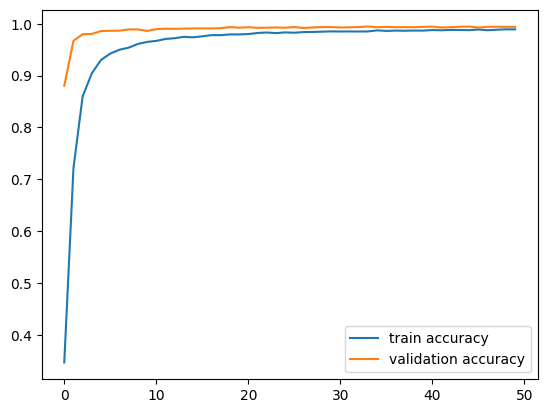

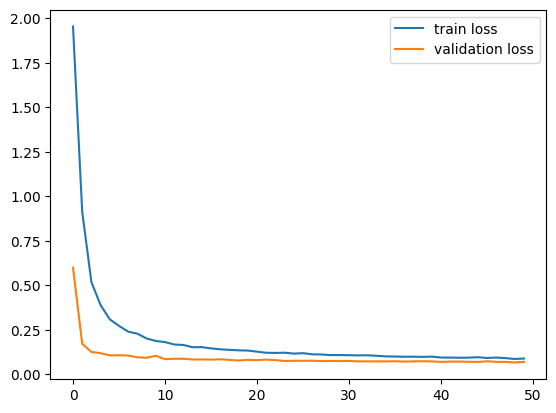

In [16]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

### Confusion Matrix

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


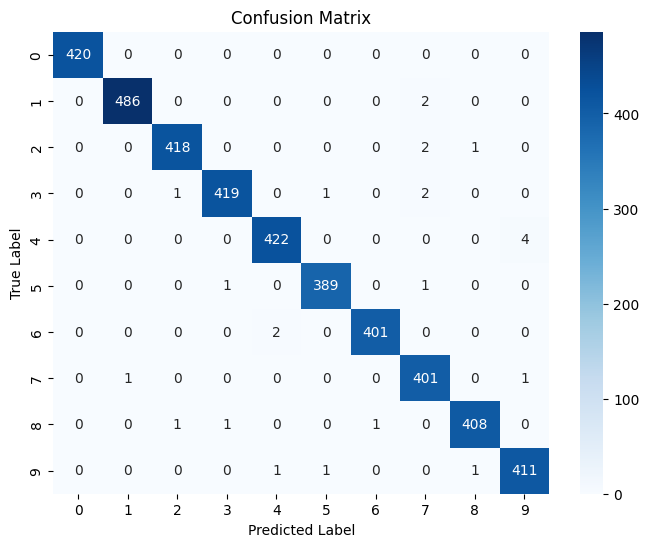

In [17]:
# 1. Make predictions on the validation or test set
y_pred_probs = model.predict(X_val)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# 2. Generate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# 3. Define class names (digits 0 to 9)
class_names = [i for i in range(10)]

# 4. Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Predictions

In [18]:
predictions = model.predict(X_test, batch_size=128)

219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [19]:
predicted_classes = np.argmax(predictions, axis=1)

In [20]:
submission_df = pd.DataFrame({
    'ImageId': range(1, len(predicted_classes) + 1),
    'Label': predicted_classes
})
submission_df.to_csv('submission.csv', index=False)

<div style="border: 2px solid #84172D; padding: 15px; border-radius: 10px; background-color: #f9f9f9; color: #333;">
    <p style="font-size: 26px; font-family: 'Arial'; line-height: 1.6em; text-align: center; color: #84172D;">🙏 Thank You for Reading the Notebook!</p>
    <p style="text-align: center; color: #333; font-size: 16px">Your support is truly appreciated. If you found this helpful, feel free to upvote and leave feedback.</p>
    <p style="text-align: center; color: #056C90; font-size: 18px ">🚀 <b>Happy Coding!</b> 💻</p>
</div>